# Image data augmentation with Keras

- Introduction and Importing Libraries
- Rotation
- Width and Height Shifts
- Brightness
- Shear Transformation
- Zoom
- Channel Shift
- Horizontal and Vertical Flips
- Data Normalization
- Rescale and Preprocessing Function
- Using in Model Training

In [2]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform
colab_path_notebooks = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/'

## Import libraries

In [4]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow ', tf.__version__)

Using TensorFlow  2.2.0


## Rotation

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
  # Your code here
  rotation_range=40 # aplica aleatoriamente entre -40° y 40°
)

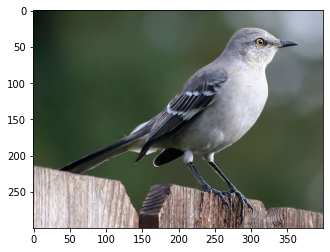

In [15]:
#image_path = 'images/train/cat/cat.jpg'
image_path = colab_path_notebooks + 'test_ani/xxx.jpg'

plt.imshow(plt.imread(image_path))

In [27]:
x, y = next(generator.flow_from_directory(colab_path_notebooks + 'test_ani/', batch_size=1))
#plt.imshow(x[0].astype('uint8')); # Revizar!!!

Found 0 images belonging to 0 classes.


array([], shape=(0, 0), dtype=float32)

## Width and Height shifts

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
	# your code here
  width_shift_range=[-100, -50, 0, 50, 100], # valores explicitos de desplazamiento horizontal
  height_shift_range=[-50, 0, 50] # valores explicitos vertical
)

In [31]:
x, y = next(generator.flow_from_directory(colab_path_notebooks + 'test_ani/', batch_size=1))
#plt.imshow(x[0].astype('uint8')); # Revizar!!!

Found 0 images belonging to 0 classes.


## Brightness

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
	# your code here
  brightness_range=(0.5, 2.)  #Cualquier valor en el rango
)

In [34]:
x, y = next(generator.flow_from_directory(colab_path_notebooks + 'test_ani/', batch_size=1))
#plt.imshow(x[0].astype('uint8')); # Revizar!!!

Found 0 images belonging to 0 classes.


## Shear transformation

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
	# your code here
  shear_range=40 # Rotacion respecto origen de imagen
)

In [36]:
x, y = next(generator.flow_from_directory(colab_path_notebooks + 'test_ani/', batch_size=1))
#plt.imshow(x[0].astype('uint8')); # Revizar!!!

Found 0 images belonging to 0 classes.


## Zoom

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
	# your code here
  zoom_range=[0.5, 1.2] # valores minimo y maximo, defecto es 1
)

In [38]:
x, y = next(generator.flow_from_directory(colab_path_notebooks + 'test_ani/', batch_size=1))
#plt.imshow(x[0].astype('uint8')); # Revizar!!!

Found 0 images belonging to 0 classes.


## Channel shift

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
	# your code here
  channel_shift_range=100 # valor para los tres canales
)

In [40]:
x, y = next(generator.flow_from_directory(colab_path_notebooks + 'test_ani/', batch_size=1))
#plt.imshow(x[0].astype('uint8')); # Revizar!!!

Found 0 images belonging to 0 classes.


In [41]:
x.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


nan

In [42]:
np.array(Image.open(image_path)).mean()

94.21645

## Flips

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
	# your code here
  horizontal_flip=True, # Los aplica aleatoriamente
  vertical_flip=True
)

In [44]:
x, y = next(generator.flow_from_directory(colab_path_notebooks + 'test_ani/', batch_size=1))
#plt.imshow(x[0].astype('uint8')); # Revizar!!!

Found 0 images belonging to 0 classes.


Se pueden aplicar simultaneamente!!!

Otros parametros interesantes.

## Normalization
Featurewise

In [0]:
#x_mean = x_train.mean() # La normalización es algo asi...
#x_std = x_train.std()
#x_train_norm = (x_train - x_mean)/x_std

In [46]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
	# Your code here
	featurewise_center=True,
	featurewise_std_normalization=True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 2s 0us/step


In [47]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.36376283 0.7075862 [[4]]
120.70756512369792


Samplewise

In [51]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
  # your code here
  samplewise_center=True,
  samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

5.9604645e-08 1.0 [[0]]


## Rescale and preprocessing function

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
	# your code here
  rescale=1.,
  preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input # Cualquiera tridimensional
)

In [53]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.05515219 0.52607405 [[3]]


## Using in model training

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
	# your code here
  preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input, # Cualquiera tridimensional
  horizontal_flip=True,
  rotation_range=20
)

Creemos ahora el modelo:

In [55]:
model = tf.keras.models.Sequential([
  tf.keras.applications.mobilenet_v2.MobileNetV2(
      include_top=False, input_shape=(32, 32, 3),
      pooling='avg'
  ),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
	loss='sparse_categorical_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)

9412608/9406464 [==============================] - 0s 0us/step


In [56]:
_ = model.fit(
	generator.flow(x_train, y_train, batch_size=32),
	epochs=1, steps_per_epoch=10
)

10/10 [==============================] - 2s 238ms/step - loss: 3.3435 - accuracy: 0.2125
